# Chemoinformatics Exercise 3 - 28 Nov 2022

For this exercise you can follow the tutorial. All relevant code is provided. Some suggestions (labeled as "TO DO"s) are given. Following up on the suggestions can help to enhance your understanding.

# Hierarchical Clustering in Python

#### References

[1] Xue, L.; Godden, J.; Gao, H.; Bajorath, J. Identification of a preferred set of molecular descriptors for compound classification based on principal component analysis. Journal of Chemical Information and Computer Sciences 1999, 39, 699-704

[2] MACCS Structural keys; Accelrys Inc.: San Diego, CA, USA

[3] Molecular Operating Environment (MOE). http://www.chemcomp.com, Chemical Computing Group: Montreal, Canada

[4] Todeschini, R.; Consonni, V. Handbook of Molecular Descriptors. Wiley-WCH: Weinheim, 2000

[5] Cereto-Massagué A. et al. Molecular fingerprint similarity search in virtual screening. Methods 2014, 71, 58-63

[6] McGregor, M.J.; Muskal, S.M. Pharmacophore fingerprinting. 1. Application to QSAR and focused library design. Journal of Chemical Information and Computer Sciences 1999, 39, 569-574

[7] Rogers, D.; Hahn, M. Extended-connectivity fingerprints. Journal of Chemical Information and Modeling 2010, 50, 742-754.

[8] Willett, P. Chemical Similarity searching. Journal of Chemical Information and Computer Sciences 1998, 38, 983-996

[9] Jain, A.K.; Murty, M.N.; Flynn, P.J. Data clustering: A review. ACM Computing Surveys 1999, 31, 264-323

[10] Rand, W.M. (1971). Objective criteria for the evaluation of clustering methods. Journal of the American Statistical Association 1971, 66, 846–850

[11] Kaufman, L.; Rousseeuw, P.J. Clustering by means of medoids. In Statistical Data Analysis Based on the L1–Norm and Related Methods, edited by Y. Dodge. North-Holland 1987, 405–416.


## Theoretical background

The goal of cluster analysis of compound data sets is to generate an organization of compounds into different clusters (also called groups or communities) so that compounds within a cluster are, with respect to pre-defined characteristics or descriptors, more similar to each other than to compounds in other clusters. A separation of a data set into different disjoint communities is called a clustering or a partition. In practice a clustering can be represented by assigning a label to each object were the label defines the cluster.

As prerequisite of cluster analysis, distances between (or similarities of) compounds need to be quantified on the basis of a given representation. How data is clustered depends on the following three aspects:
    
1. The representation of the data,
2. A metric to assess distances between data points using a specific representation,
3. The algorithm used for clustering.

Two of the most popular representations of molecules for numerical analysis are numerical descriptors (with continuous value ranges) and binary fingerprint representations. Descriptors frequently encode physicochemical properties of molecules like the octanol/water partition coefficient, molar refractivity, or molecular weight but also capture topological properties characterizing the shape of a molecule. Compounds can be categorized using literally thousands of different descriptors [4] many of which can be calculated using open-source or commercial software packages like Molecular Operating Environment (MOE) [3]. Fingerprints, on the other hand, typically encode either the presence or absence of structural features of a molecule as binary values. Many different fingerprint designs exist [5], ranging from fingerprint encoding a fixed small set of features like MACCS [2] and fingerprints encoding pharmacophore properties [6] to connectivity fingerprints that systematically enumerate certain structural features atom environments [7].
In descriptor spaces, distances are usually measured by metric functions like the Euclidean distance using raw or normalized data. For binary fingerprints, the by far most popular method for assessing molecular similarity is the Tanimoto coefficient (Tc) or Jaccard index[8]. The Tc is defined as the ratio of the number of common features of two molecules to the total number of features in either molecule and falls in the range 0 to 1. The Tc can be converted into a distance metric by taking the complement $1-\text{Tc}$ . This distance metric is known as the Soergel distance.

Algorithms

A large number of clustering methods exist that differ, for one, in the notion of what constitutes a “good” cluster and, for the other, in the efficiency with which the clusters are determined [9]. This tutorial focuses on hierarchical clustering, which is considered to be a relatively slow method with a run time of $O(n^3)$, i.e. cubic with respect to the number of objects to cluster, and only suited for data sets of moderate size. As the name indicates hierarchical clustering methods construct a hierarchy of clusters. This is done either following a “bottom up” approach by starting with single object clusters and successively merging clusters considered to be proximal, or in a “top down” approach starting with all objects in a single cluster and proceeding by successively splitting a cluster into more clusters of smaller size. This latter approach is known as divisive clustering and the former as agglomerative clustering, which will be explained in detail below.
Centroid-based methods form a conceptually different subgroup of clustering methods. Here, each cluster is represented by a centroid and objects are assigned to a cluster based on their closeness to the centroid. The most prominent of these methods is $k$-means clustering, which aims to identify $k$ centroids in such a way that the squared distances of objects to the centroid become minimal. The optimization problem itself is NP-hard, however the problem lends itself to a straightforward iterative heuristic algorithm:

- Initially, distribute $k$ centroids at random.
- (Re-)assign each object to one of the $k$ centroids based on its minimum distance.
- Update each centroid to the average of the objects assigned to it.
- Repeat.

The algorithm requires an embedding of the data points in a Euclidean space as is given by (normalized) continuous descriptor vectors. It is not suited for fingerprint representations whose distance relationships are characterized by pairwise similarities and not by an embedding in an $n$-dimensional space.
Agglomerative clustering can be described by the following steps:

- Start by assigning each object to its own cluster.
- Select the two clusters that are “closest” together.
- Merge the two clusters.
- Repeat until only one cluster is left.

The second step requires further specification. In order to specify closeness the concept of distance between objects needs to be extended to distance between clusters. This can be done in a number of different ways, each implementing different concepts of the notion of a cluster.
Three popular choices to assign distances between to clusters $A$ and $B$ are:


1. Choose the distance between the two objects in each cluster closest to each other, i.e. $d_\text{SL}(A,B)=\min \{ d(a,b) | a \in A,b \in B \}$. This approach is known as single-linkage clustering.
2. Choose the distance between the two objects in each cluster farthest away from each other, i.e. $d_\text{CL}(A,B)=\max \{ d(a,b) | a \in A,b \in B \}$. This approach is known as complete linkage.
3. Choose the average distance between objects of the two clusters, i.e. $d_\text{AL}(A,B)=\frac{1}{|A||B|}\sum_{a \in A,b \in B} d(a,b)$. This approach is known as average linkage clustering.

Which of the definitions should be considered preferred and will yield a “good” clustering will depend on the data and how it is distributed as well as the notion of what a good clustering should look like, depending on goals and applications.

Especially in chemoinformatics another approach known as Ward’s criterion for joining clusters has been popular for agglomerative clustering. According to Ward’s criterion one considers the total variance of all objects within each cluster. That is, for clusters $A_1,…,A_m$ consider $\sum_{i=1}^m \text{var} (A_i)$ . Each time two clusters are merged the total variance will increase. Ward’s criterion states that two clusters should be joined that result in the smallest increase of the total variance.


## Data

Three compound data sets consisting of 40 5-HT serotonin receptor ligands (file `5HT.sdf`), 35 tyrosine kinase inhibitors (file `TK.sdf`), and 48 HIV protease inhibitors (file `HIV.sdf`) originally collected from the literature [1]. For the compound data MACCS fingerprints [2] and 20 numerical descriptor values have been calculated using MOE [3]  (files data.fp-maccs.dat and data.desc.dat).



### Basic set of libraries and modules

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Fingerpints for clustering

In [10]:
df_fp = pd.read_csv("data.fp-maccs.dat",sep="\t")
df_fp.sample(n=8)

class                                              MACCS
27      H  36,47,59,62,75,79,81,83,85,86,88,93,95,96,98,1...
17      H  37,46,59,64,65,75,77,79,81,83,85,87,88,90,91,9...
44      V  19,37,42,52,54,65,69,72,75,77,80,83,84,85,87,9...
21      H  27,37,59,64,65,75,77,79,81,83,85,87,88,90,91,9...
55      V  19,37,52,54,65,69,72,75,77,80,83,85,90,91,94,9...
114     T  38,46,65,77,79,80,82,87,98,100,104,105,107,111...
78      V  19,34,37,54,72,75,77,85,90,91,95,97,99,100,106...
36      H  36,47,59,62,75,79,81,83,85,86,88,91,93,95,96,9...

The table has two columns. Column `class` denotes the activity class and `MACCS` is the MACCS fingerprint. Both entries are strings, which is fine for the class label but useless for the fingerprint. 

### Task 1: Convert the `MACCS` column entries from strings to sets of int


#### 1.1. Convert a single string of comma separated features to a set of int features

In [11]:
def fp_to_set(line):
    if not isinstance(line,set):
        return eval("{{{}}}".format(line))
    else:
        return line

In [12]:
fp_to_set("2,7,11,13,19")

{2, 7, 11, 13, 19}

#### 1.2. Convert column of fingerprint strings to column of sets

In [13]:
df_fp["MACCS"] = df_fp["MACCS"].map(fp_to_set)

In [14]:
df_fp.sample(n=8)

class                                              MACCS
118     T  {131, 133, 134, 135, 137, 142, 145, 151, 156, ...
63      V  {128, 129, 131, 132, 137, 138, 139, 140, 142, ...
78      V  {128, 129, 131, 137, 138, 139, 142, 143, 145, ...
57      V  {128, 129, 130, 131, 137, 138, 139, 142, 143, ...
90      T  {131, 132, 133, 134, 135, 137, 139, 142, 145, ...
42      V  {128, 129, 130, 131, 133, 135, 137, 138, 139, ...
39      H  {128, 129, 133, 134, 135, 137, 138, 142, 143, ...
59      V  {128, 129, 130, 131, 137, 138, 139, 142, 143, ...

### Task 2: Take a look at the data

#### 2.1. Examine class frequency distribution

In [15]:
df_fp["class"].value_counts()

V    48
H    40
T    35
Name: class, dtype: int64

Entries labeled `V` correspond to the HIV protease inhibitors; those labeled `H`correspond to 5-HT serotonin receptor ligands and `T` corresponds to tyrosine kinase inhibitors.

#### 2.2. Understanding MACCS fingerprints

MACCS consists of 166 features but one might wonder how many features are typically present in a molecule?

<AxesSubplot: >

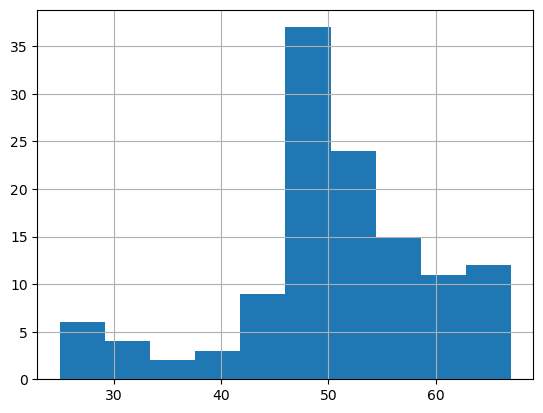

In [16]:
df_fp["MACCS"].map(len).hist()

### Task 3: Determine pairwise similarities
Hierarchical clustering requires knowledge of all pairwise similarities/distances. These can be conveniently stored in a matrix.

#### 3.1 Determining the Tanimoto coefficient
Given two fingerprints `A` and `B` as sets of features the Tanimoto coefficient $s_t=\frac{c}{a+b-c}$ can be calculates using `a=len(A)` and `b=len(B)` and `c=len(A.intersection(B)`

In [17]:
def tc(A,B):
    a = len(A)
    b = len(B)
    if a == b == 0:
        return 0.0
    else:
        c = len(A.intersection(B))
        return c/(a+b-c)

In [18]:
tc({1,2,3,4,5},{3,4,5,6})

0.5

#### 3.2 Calculate the similarity matrix

In [19]:
def tc_mat(series):
        n = len(series)
        mat = np.ones((n,n))
        for i in range(n):
            for j in range(n):
                mat[i,j] = tc(series[i],series[j])
        return mat

In [20]:
tc_mat(df_fp["MACCS"][:5])

array([[1.        , 0.88888889, 0.84210526, 0.87272727, 0.88888889],
       [0.88888889, 1.        , 0.9122807 , 0.94545455, 1.        ],
       [0.84210526, 0.9122807 , 1.        , 0.89655172, 0.9122807 ],
       [0.87272727, 0.94545455, 0.89655172, 1.        , 0.94545455],
       [0.88888889, 1.        , 0.9122807 , 0.94545455, 1.        ]])

Similarity matrices are symmetric and half the values are redundantly calculated and stored. Therefore, some clustering implementations (from `scipy`) accept as input a distance matrix in condensed form. The condensed form is a one dimensional array where the entries of the upper triangular matrix (without the diagonal) are consecutively stored left to right and row by row.

In [21]:
import itertools

def tc_mat_condensed(series):
        n = len(series)
        mat = np.zeros((n*(n-1)//2,))
        for idx,(i,j) in enumerate(itertools.combinations(range(n),2)):
            mat[idx] = tc(series[i],series[j])
        return mat

In [22]:
tc_mat_condensed(df_fp["MACCS"][:5])# single array

array([0.88888889, 0.84210526, 0.87272727, 0.88888889, 0.9122807 ,
       0.94545455, 1.        , 0.89655172, 0.9122807 , 0.94545455])

Determine the similarity matrices:

In [23]:
sim_mat_fp = tc_mat(df_fp["MACCS"])
sim_mat_condensed_fp = tc_mat_condensed(df_fp["MACCS"])

Agglomerative clustering requires distances and not similarities. As distance we use the Soergel distance:

In [24]:
dist_mat_fp = 1-sim_mat_fp
dist_mat_condensed_fp = 1-sim_mat_condensed_fp

### Task 4: Perform hierarchical clustering

Hierarchical clustering methods are implemented for instance in `scipy` and in `scikit-learn`. Here we will use `scipy`

#### 4.1 Perform agglomerative hierarchical clustering using `scipy`

In [25]:
#!pip install scipy
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree
hier_ward_fp = linkage(dist_mat_condensed_fp,'ward')

##### 4.1.1 Show dendogram

In [26]:
labelList = list(df_fp["class"])

plt.figure(figsize=(15, 10))
dendrogram(hier_ward_fp,
            orientation='top',
            labels=labelList)
plt.show()

The height where clusters are merged refers to the “distance” between the clusters. Because hierarchical clustering per se does not yield a fixed number of clusters the clustering tree has to be “cut” at a certain height to yield a specific separation into clusters. The visualization can help to identify appropriate levels at which to separate the clusters. Large vertical stretches without a merge indicate that the distance between clusters to be merged is high and suggest that cutting a tree at that level will yield clusters that are well separated. From the plot one can see that 3 is actually a good number of clusters and clusters can be generated using the `cut_tree` function

##### 4.1.2 Get clusters and cluster labels, add cluster labels as additional column to dataframe

In [27]:
label_list = cut_tree(hier_ward_fp,n_clusters=3)# from the dendrogram we set the number of cluster, which is 3
label_list[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

The `cut_tree` function allows cutting at different levels at the same time, e.g. `cut_tree(hier_ward_fp,n_clusters=[3,6])`. That explains why a list is returned for each item. 

In [28]:
# Extract labels and add as column to data frame
labels = [x[0] for x in label_list]
df_fp["Ward_ids"] = labels

In [29]:
df_fp.sample(n=8)

class                                              MACCS  Ward_ids
121     T  {131, 133, 135, 137, 142, 145, 149, 151, 156, ...         2
5       H  {128, 133, 134, 135, 137, 142, 144, 145, 147, ...         0
0       H  {128, 133, 134, 135, 136, 137, 142, 144, 145, ...         0
112     T  {128, 129, 131, 132, 133, 135, 137, 138, 142, ...         2
56      V  {128, 129, 130, 131, 137, 138, 139, 142, 143, ...         1
49      V  {128, 129, 131, 133, 135, 137, 138, 139, 142, ...         1
50      V  {128, 129, 131, 133, 135, 137, 138, 139, 142, ...         1
94      T  {128, 131, 132, 133, 134, 135, 137, 138, 139, ...         2

##### 4.1.3 Repeat clustering with different linkage rules

Here only single linkage is shown. Be sure to also try complete and average linkage. Decide, based on the dendogram, on an appropriate number of clusters and compare the results in a similar way as shown below.

In [30]:
hier_single_fp = linkage(dist_mat_condensed_fp, 'average')
labelList = list(df_fp["class"])

plt.figure(figsize=(15, 10))
dendrogram(hier_single_fp,
            orientation='top',
            labels=labelList)
plt.show()

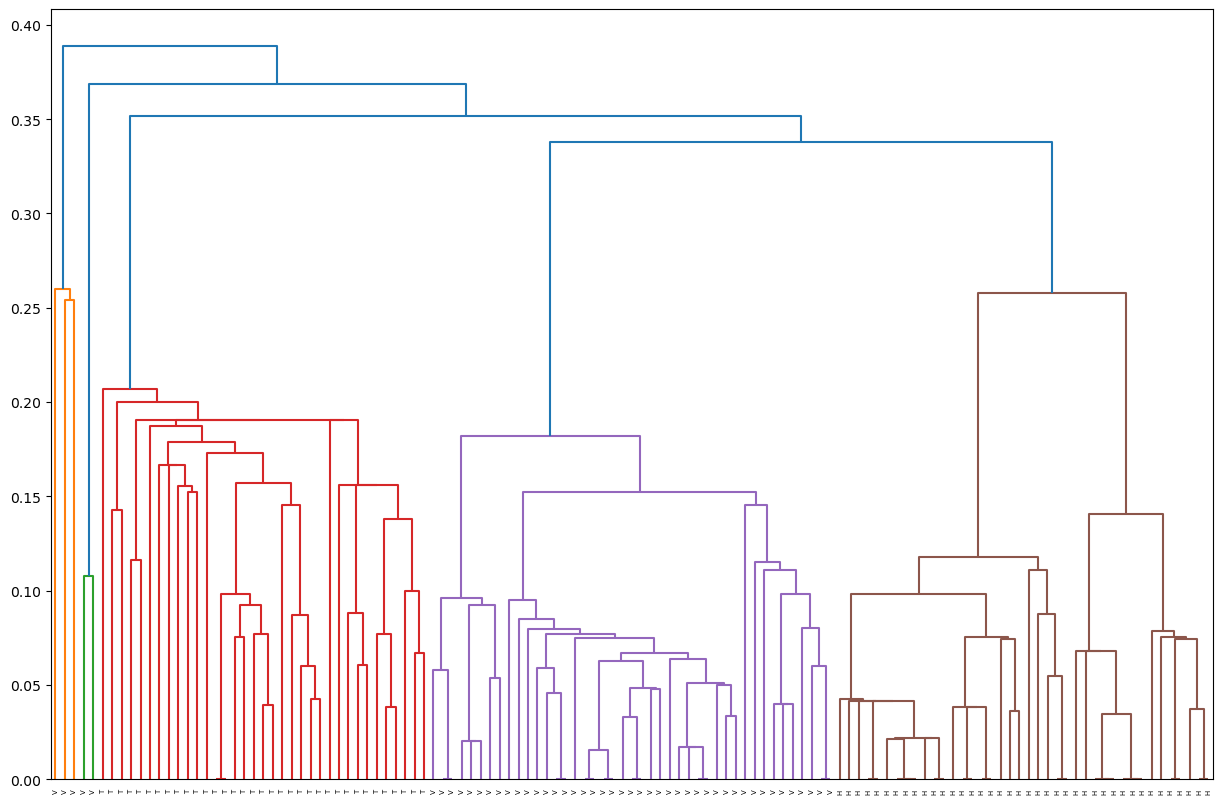

In [31]:
hier_single_fp = linkage(dist_mat_condensed_fp, 'single')
labelList = list(df_fp["class"])

plt.figure(figsize=(15, 10))
dendrogram(hier_single_fp,
            orientation='top',
            labels=labelList)
plt.show()

In [32]:
hier_single_fp = linkage(dist_mat_condensed_fp, 'complete')
labelList = list(df_fp["class"])
                         
plt.figure(figsize=(15, 10))
dendrogram(hier_single_fp,
            orientation='top',
            labels=labelList)
plt.show()

Ignoring class labels, the dendogram would suggest partitioning the data into 5 clusters rather than three. We will try both:

In [33]:
label_list = cut_tree(hier_single_fp,n_clusters=[3,5])# for cluster of 3 and 5
print(label_list[:5])
labels3 = [x[0] for x in label_list]
labels5 = [x[1] for x in label_list]
df_fp["Single3_ids"] = labels3
df_fp["Single5_ids"] = labels5
df_fp.sample(n=8)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


class                                              MACCS  Ward_ids  \
46      V  {128, 129, 130, 131, 133, 135, 137, 138, 139, ...         1   
95      T  {131, 132, 133, 134, 135, 137, 138, 139, 142, ...         2   
20      H  {128, 133, 134, 135, 137, 142, 144, 145, 147, ...         0   
111     T  {128, 129, 131, 132, 133, 135, 137, 138, 142, ...         2   
112     T  {128, 129, 131, 132, 133, 135, 137, 138, 142, ...         2   
118     T  {131, 133, 134, 135, 137, 142, 145, 151, 156, ...         2   
75      V  {128, 129, 131, 137, 138, 139, 140, 142, 143, ...         1   
24      H  {128, 133, 134, 135, 137, 138, 142, 144, 145, ...         0   

     Single3_ids  Single5_ids  
46             1            1  
95             2            3  
20             0            0  
111            2            3  
112            2            3  
118            2            4  
75             1            1  
24             0            0

### Task 5: Comparing clusterings

Clustering is in unsupervised machine learning method. Thus, although it might be able to partition the data into sensible clusters (here, according to their protein activity) it cannot label them with the target. For example, we cannot know beforehand whether cluster labeled 0 should correspond to H, T, or V.

The idea for quantitatively assessing the quality of a clustering or to compare whether two clustering are similar is to consider pairs of items (molecules). 
If we consider our molecules, if two molecules belong to the same activity class, then they should also be grouped together in the same cluster and if they belong to different activity classes they should be grouped in different clusters. This concept is quantified in the Rand index [10] (https://en.wikipedia.org/wiki/Rand_index ). It considered all pairs of items and is defined as the fraction of pairs that are either consistenly clustered in the same cluster or in different clusters across two different partitionings. The Rand index has a range of 0 to 1. (Often the adjusted Rand index is used that accounts for pairs that are clustered consistently simply by chance and has a range from -1 to 1. `scikit-learn` implements this version)
Alternative methods for comparing partitions are based on information theory and calculate the mutual information. `scikit-learn` contains an implementation.

As the Rand index is defined as a simple ratio it yields easily interpretable quantities and is also easy to implement:

#### 5.1 Implement the Rand Index

In [34]:
def rand_index(labels_A,labels_B):# pair of object, which is pair of fingerprint in our case
    """
    labels_A and labels_B are two lists of item labels partitioning a set
    of items. The types of the labels are arbitrary and do not have to be
    consistent. The Rand index calculates the fraction of item pairs that
    are consistently labeled in both partitions
    >>> rand_index([1,1,2,2],['a','b','a','b'])
    0.3333333333333333
    >>> rand_index([int,int,int,float,float],[dict,set,set,set,set])
    0.4
    >>> rand_index([1,2,2,3,3,3,4,4,4,4],[4,3,3,2,2,2,1,1,1,1])
    1.0
    """
    assert len(labels_A) == len(labels_B)
    n = len(labels_A)
    total = n*(n-1)/2 # total number of pairs
    consistent = 0
    for i,j in itertools.combinations(range(n),2):
        # Check for consistent assignment
        if (labels_A[i]==labels_A[j]) == (labels_B[i]==labels_B[j]):# both has to be true or both false
            consistent += 1
    return consistent/total

# true, false# true, true#

In [35]:
rand_index(['A','A','B','B'],['b','b','a','a'])

1.0

# new

In [39]:
def get_pair_label(labels):
    n = len(labels)
    return [int(labels[i]==labels[j]) for i,j in itertools.combinations(range(n),2)]
#1 if they are in the same cluster
#0 if they are in different cluster

In [ ]:
#recall for single_3 is high, if we clusther major of the objects in one cluster
#priciseion for single_3 is low, we cluster different object in different 
#


This example has 4 items and thus 4*3/2 = 6 possible pairs of items. You can see that none of the pairs are clustered together in the same cluster for both partitions. However, two pairs are not clustered together for both partitions yielding the Rand index of 1/3.

#### 5.2 Assess the quality of the clusterings

In [40]:
rand_index(df_fp["class"],df_fp["Ward_ids"])

1.0

As we already saw the Ward clustering perfectly recognized the activity classes

In [41]:
rand_index(df_fp["class"],df_fp["Single3_ids"])

1.0

Using single-linkage with 3 clusters yields very bad results.

In [42]:
rand_index(df_fp["class"],df_fp["Single5_ids"])

0.9345595095295215

However, using 5 clusters yields good correspondence with the activity class labels.

### TO DO: Determine recall and precision

https://en.wikipedia.org/wiki/Rand_index explains how the Rand index is a measure for accuracy where the positives are pairs where items belong to the same cluster and negatives are pairs where items belong to different clusters. Thus pairs can be categorizes as true positvies/negatives and as false positives/negatives.

Implement the two measures precision and recall and use them to compare clustering performances.



In [31]:
#conda install scikit-learn

In [64]:
true_labels = get_pair_label(df_fp["class"])
pred_labels_wards = get_pair_label(df_fp["Ward_ids"])
pred_labels_single3 = get_pair_label(df_fp["Single3_ids"])
pred_labels_single5 = get_pair_label(df_fp["Single5_ids"])
#precision:

from sklearn.metrics import precision_score, recall_score
precision_score(true_labels,pred_labels_wards, average='binary')


1.0

In [65]:
recall_score(true_labels,pred_labels_wards, average='binary')

1.0

In [66]:
precision_score(true_labels,pred_labels_single3, average='binary')

1.0

In [68]:
#recall
recall_score(true_labels,pred_labels_single3, average='binary')

1.0

In [71]:
recall_score(true_labels,pred_labels_single5, average='micro')# micro gives the same with the rand_index; macro and binary give lower :0.90 and 0.80

0.9345595095295215

### Task 6: Hierarchical clustering using descriptors

#### 6.1 Read in and understand the data

In [72]:
df_desc = pd.read_csv("data.desc.dat",sep="\t")

In [73]:
df_desc.sample(n=8)

class  a_acc  a_acid     a_ICM  a_nCl  a_nI  a_nS  BCUT_PEOE_1  \
83      V      6       0  1.460740      0     0     0    -0.625154   
51      V      5       0  1.476356      0     0     0    -0.625154   
41      V      5       2  1.518740      0     0     0    -0.625154   
22      H      2       0  1.910750      0     0     1    -0.534435   
33      H      2       0  1.579205      0     0     1    -0.534280   
121     T      3       0  1.448816      0     0     0    -0.655397   
110     T      3       0  1.518666      0     0     0    -0.603647   
82      V      4       0  1.365961      0     0     0    -0.600148   

     BCUT_PEOE_2  BCUT_SLOGP_1  ...  b_1rotN   b_1rotR    b_rotR  \
83      0.676503     -0.516116  ...       10  0.208333  0.229167   
51      0.672769     -0.516116  ...        8  0.170213  0.170213   
41      0.672769     -0.516116  ...        9  0.183673  0.183673   
22      0.587837     -0.407425  ...        3  0.115385  0.192308   
33      0.629871     -0.515822  ...        5  0.172414  0.172414   
121     0.627455     -0.597072  ...        3  0.136364  0.136364   
110     0.653230     -0.571283  ...        8  0.285714  0.285714   
82      0.624388     -0.502172  ...        8  0.190476  0.214286   

     GCUT_SLOGP_1  GCUT_SLOGP_2  GCUT_SMR_1  lip_don  opr_nrot  PEOE_RPC+  \
83      -0.373417      0.138344   -0.216057        4        11   0.056877   
51      -0.318942      0.159693   -0.216057        4         8   0.092041   
41      -0.360846      0.159049   -0.216057        3         9   0.097354   
22      -0.266600      0.260200   -0.184695        1         2   0.217970   
33      -0.333009      0.158003   -0.206245        2         5   0.119672   
121     -0.320565      0.163676   -0.205068        2         3   0.088203   
110     -0.303823      0.167331   -0.204464        3         8   0.122729   
82      -0.292410      0.140428   -0.216057        2         9   0.073743   

     vsa_base  
83        0.0  
51        0.0  
41        0.0  
22        0.0  
33        0.0  
121       0.0  
110       0.0  
82        0.0  

[8 rows x 21 columns]

In [74]:
df_desc.describe()

a_acc      a_acid       a_ICM       a_nCl        a_nI        a_nS  \
count  123.000000  123.000000  123.000000  123.000000  123.000000  123.000000   
mean     3.707317    0.065041    1.586361    0.130081    0.024390    0.186992   
std      1.677878    0.356206    0.150058    0.423865    0.154888    0.391500   
min      1.000000    0.000000    1.326270    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    1.472676    0.000000    0.000000    0.000000   
50%      3.000000    0.000000    1.554241    0.000000    0.000000    0.000000   
75%      5.000000    0.000000    1.671481    0.000000    0.000000    0.000000   
max      8.000000    2.000000    1.964908    2.000000    1.000000    1.000000   

       BCUT_PEOE_1  BCUT_PEOE_2  BCUT_SLOGP_1  BCUT_SMR_1     b_1rotN  \
count   123.000000   123.000000    123.000000  123.000000  123.000000   
mean     -0.594618     0.641240     -0.516614   -0.438263    6.260163   
std       0.050933     0.033528      0.065192    0.036496    2.853923   
min      -0.693835     0.565847     -0.703684   -0.485852    2.000000   
25%      -0.625154     0.618527     -0.534180   -0.480489    4.000000   
50%      -0.603431     0.641421     -0.516116   -0.436695    6.000000   
75%      -0.549918     0.672766     -0.478347   -0.420599    8.500000   
max      -0.492915     0.705110     -0.383892   -0.355162   13.000000   

          b_1rotR      b_rotR  GCUT_SLOGP_1  GCUT_SLOGP_2  GCUT_SMR_1  \
count  123.000000  123.000000    123.000000    123.000000  123.000000   
mean     0.177004    0.193452     -0.317096      0.185576   -0.206068   
std      0.052250    0.047619      0.037117      0.046810    0.011026   
min      0.080000    0.095238     -0.414507      0.131451   -0.223496   
25%      0.137147    0.166667     -0.335812      0.155026   -0.216057   
50%      0.176471    0.188679     -0.317962      0.163828   -0.207656   
75%      0.207615    0.218071     -0.291792      0.231544   -0.199382   
max      0.333333    0.333333     -0.255128      0.294958   -0.173146   

          lip_don    opr_nrot   PEOE_RPC+    vsa_base  
count  123.000000  123.000000  123.000000  123.000000  
mean     2.430894    6.121951    0.122850    0.046200  
std      1.215213    3.184453    0.053112    0.512381  
min      1.000000    1.000000    0.056877    0.000000  
25%      1.000000    3.000000    0.087520    0.000000  
50%      2.000000    6.000000    0.105001    0.000000  
75%      4.000000    9.000000    0.131958    0.000000  
max      5.000000   13.000000    0.234218    5.682576

Descriptions and explanations for the different descriptor types can be found in MOE [3]. The descriptors combine values of very different units. Using "raw" descriptor values might not be appropriate due to the different scale and range of different descriptors. This can be seen by observing the different ranges as given by the standard deviation and the quantile ranges.

For now we proceed with the raw values.

In [75]:
df_desc["class"].value_counts()

V    48
H    40
T    35
Name: class, dtype: int64

#### 6.2 Determine the distance matrix

We drop the class label column and are left with a dataframe consisting only of the descriptors for determination of the distance matrix.

In [76]:
numerical_data = df_desc.drop("class",axis=1)

The scipy method `pdist` in `scipy.spatial.distance` can be used to determine a condensed distance matrix, in the same format used above for fingerprints.

In [77]:
from scipy.spatial.distance import pdist,euclidean
dist_mat_condensed_desc = pdist(numerical_data,"euclidean")
pdist(numerical_data[:5],"euclidean")

array([0.03736694, 1.41578599, 1.41723032, 1.41693624, 1.41542335,
       1.41732507, 1.4156994 , 0.05477084, 0.09673007, 0.13792269])

#### 6.3 Perform hierarchical clustering

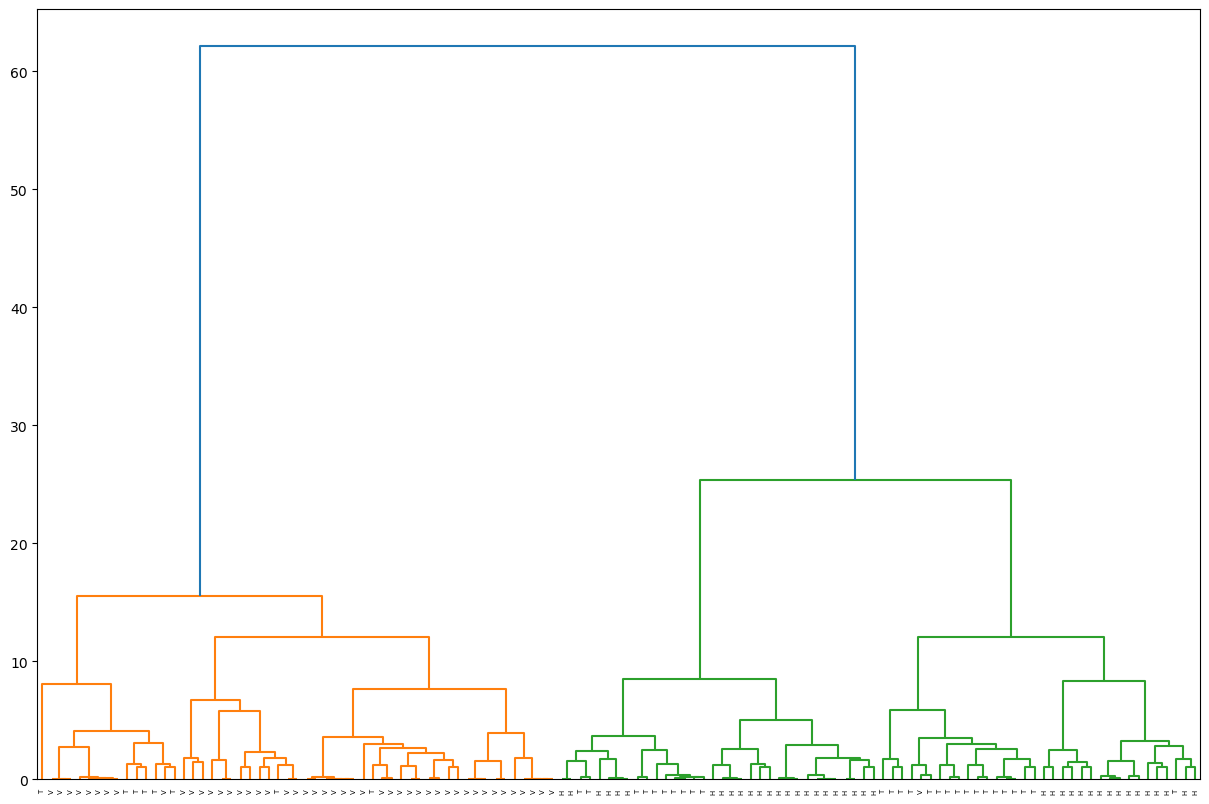

In [78]:
hier_ward_desc = linkage(dist_mat_condensed_desc, 'ward')
labelList = list(df_fp["class"])

plt.figure(figsize=(15, 10))
dendrogram(hier_ward_desc,
            orientation='top',
            labels=labelList)
plt.show()

Judging from the dendogram plot, two or three clusters seem reasonable.

In [79]:
label_list = cut_tree(hier_ward_desc,n_clusters=[2,3])
labels2 = [x[0] for x in label_list]
labels3 = [x[1] for x in label_list]
df_desc["Ward2_ids"] = labels2
df_desc["Ward3_ids"] = labels3
df_desc[["class","Ward2_ids","Ward3_ids"]].sample(n=16)

class  Ward2_ids  Ward3_ids
118     T          0          0
18      H          0          0
121     T          0          0
79      V          1          2
14      H          0          0
66      V          1          2
33      H          0          1
1       H          0          0
46      V          1          2
13      H          0          0
86      V          1          2
23      H          0          0
50      V          1          2
55      V          1          2
64      V          1          2
35      H          0          1

Using the Rand index both clusterings can be compared to the original clustering.

In [80]:
rand_index(df_desc["class"],df_desc["Ward2_ids"])

0.7619618819139011

In [81]:
rand_index(df_desc["class"],df_desc["Ward3_ids"])

0.7683593229374917

The quality of the the 2-custer partitioning and 3-cluster partionings are comparable

#### 6.4 Hierarchical clustering using scaled descriptor values

Now the data will be scaled to account for the difference descriptor types.
The standard scaler will determine mean and standard deviation for each descriptor of a reference compound data set.
Each descriptor value $x$ is then scaled by $z$-score normalization: $z=(x-\mu)/\sigma$ where $\mu$ and $\sigma$ are the mean and standard deviation of the respective descriptor.

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numerical_data)
numerical_data_scaled = scaler.transform(numerical_data)

Normally you would want to scale descriptors using a large data set of compounds as reference, so you can normalize with respect to descriptor value distributions that are representative of the chemical space.

For simplicity we chose the same data set. This is not an optimal choice especially if its descriptor value distributions are not representative of compounds in general.

In [83]:
pd.DataFrame(columns=numerical_data.columns,data=numerical_data_scaled).describe()

a_acc        a_acid         a_ICM         a_nCl          a_nI  \
count  1.230000e+02  1.230000e+02  1.230000e+02  1.230000e+02  1.230000e+02   
mean  -7.491749e-17 -5.731639e-17 -2.132892e-15 -1.074118e-16  9.026203e-17   
std    1.004090e+00  1.004090e+00  1.004090e+00  1.004090e+00  1.004090e+00   
min   -1.620136e+00 -1.833397e-01 -1.740361e+00 -3.081485e-01 -1.581139e-01   
25%   -1.021707e+00 -1.833397e-01 -7.607087e-01 -3.081485e-01 -1.581139e-01   
50%   -4.232787e-01 -1.833397e-01 -2.149234e-01 -3.081485e-01 -1.581139e-01   
75%    7.735784e-01 -1.833397e-01  5.695673e-01 -3.081485e-01 -1.581139e-01   
max    2.568864e+00  5.454356e+00  2.532990e+00  4.429634e+00  6.324555e+00   

               a_nS   BCUT_PEOE_1   BCUT_PEOE_2  BCUT_SLOGP_1    BCUT_SMR_1  \
count  1.230000e+02  1.230000e+02  1.230000e+02  1.230000e+02  1.230000e+02   
mean  -4.422840e-17 -2.926295e-15  4.829019e-16 -9.441409e-16 -1.375593e-15   
std    1.004090e+00  1.004090e+00  1.004090e+00  1.004090e+00  1.004090e+00   
min   -4.795832e-01 -1.955940e+00 -2.257865e+00 -2.881245e+00 -1.309271e+00   
25%   -4.795832e-01 -6.019724e-01 -6.801934e-01 -2.705521e-01 -1.161733e+00   
50%   -4.795832e-01 -1.737403e-01  5.413351e-03  7.673281e-03  4.312808e-02   
75%   -4.795832e-01  8.812105e-01  9.441594e-01  5.893847e-01  4.859578e-01   
max    2.085144e+00  2.004945e+00  1.912775e+00  2.044186e+00  2.286280e+00   

            b_1rotN       b_1rotR        b_rotR  GCUT_SLOGP_1  GCUT_SLOGP_2  \
count  1.230000e+02  1.230000e+02  1.230000e+02  1.230000e+02  1.230000e+02   
mean   1.335878e-16 -5.325460e-16 -1.101197e-15  4.955386e-16 -1.805241e-17   
std    1.004090e+00  1.004090e+00  1.004090e+00  1.004090e+00  1.004090e+00   
min   -1.498845e+00 -1.864118e+00 -2.070908e+00 -2.635193e+00 -1.161003e+00   
25%   -7.951885e-01 -7.659225e-01 -5.647803e-01 -5.063142e-01 -6.553159e-01   
50%   -9.153249e-02 -1.025083e-02 -1.006278e-01 -2.343831e-02 -4.665110e-01   
75%    7.880375e-01  5.882476e-01  5.191130e-01  6.845273e-01  9.860424e-01   
max    2.371264e+00  3.004167e+00  2.949517e+00  1.676381e+00  2.346304e+00   

         GCUT_SMR_1       lip_don      opr_nrot     PEOE_RPC+      vsa_base  
count  1.230000e+02  1.230000e+02  1.230000e+02  1.230000e+02  1.230000e+02  
mean   3.401073e-15  1.886477e-16 -5.054674e-17 -4.783888e-17 -2.030896e-18  
std    1.004090e+00  1.004090e+00  1.004090e+00  1.004090e+00  1.004090e+00  
min   -1.587133e+00 -1.182300e+00 -1.615002e+00 -1.247220e+00 -9.053575e-02  
25%   -9.096817e-01 -1.182300e+00 -9.843824e-01 -6.679196e-01 -9.053575e-02  
50%   -1.445832e-01 -3.560336e-01 -3.845244e-02 -3.374282e-01 -9.053575e-02  
75%    6.088647e-01  1.296500e+00  9.074775e-01  1.722028e-01 -9.053575e-02  
max    2.998097e+00  2.122766e+00  2.168718e+00  2.105433e+00  1.104536e+01

Descriptors are now centered around 0 and have a standard deviation of 1.
For data that is roughly normally distributed standard scaling is a good choice but there are alternatives. See for instance https://en.wikipedia.org/wiki/Feature_scaling

Now, calculate the distance matrix based on the normalized values.

In [84]:
dist_mat_condensed_scaled_desc = pdist(numerical_data_scaled,"euclidean")
pdist(numerical_data_scaled[:5],"euclidean")

array([1.15612311, 1.68195174, 2.01988931, 1.49886017, 1.05969201,
       1.5360043 , 0.87619529, 1.04769464, 0.80618377, 1.47624344])

Hierarchical clustering:

In [85]:
hier_ward_scaled_desc = linkage(dist_mat_condensed_scaled_desc, 'ward')
labelList = list(df_fp["class"])

plt.figure(figsize=(15, 10))
dendrogram(hier_ward_scaled_desc,
            orientation='top',
            labels=labelList)
plt.show()

In this case it looks like two or four clusters seem reasonable:

In [86]:
label_list = cut_tree(hier_ward_scaled_desc,n_clusters=[2,4])
labels2=[x[0] for x in label_list]
labels4=[x[1] for x in label_list]
df_desc["Ward_scaled2_ids"]=labels2
df_desc["Ward_scaled4_ids"]=labels4
df_desc[["class","Ward_scaled2_ids","Ward_scaled4_ids"]].sample(n=16)

class  Ward_scaled2_ids  Ward_scaled4_ids
4       H                 0                 0
81      V                 1                 2
95      T                 1                 3
17      H                 0                 0
117     T                 1                 3
68      V                 1                 2
87      V                 1                 2
65      V                 1                 2
64      V                 1                 2
32      H                 0                 1
25      H                 0                 1
114     T                 1                 3
18      H                 0                 0
91      T                 1                 3
39      H                 0                 1
77      V                 0                 1

Compare the quality of the clustering:

In [87]:
rand_index(df_desc["class"],df_desc["Ward_scaled2_ids"])

0.7587631614021059

In [88]:
rand_index(df_desc["class"],df_desc["Ward_scaled4_ids"])

0.9121684659469546

The partitioning into 4 clusters shows a significant improvement but fails to get close to the performance of fingerprint-based clustering.

### TO DO: Add more descriptors

The descriptor set provided is very limited. It does not even contain the molecular weight of the molecules. The molecular structures are provided in SD-files containing many more descriptors. This data can be used to extract  representations using more descriptors. Repeat the analysis by adding at least the atom weight descriptor.

##### For your convenience:
The file `data.desc+weight.dat` contains an additional column with the molecular weight

### TO DO: Try different clustering method
Many different clustering methods are available. Have a look how the usage of `scikit-learn` clustering methods differ from those in `scipy` and try some other methods like $k$-means [11] for the descriptor data.

### Task 6: Visualization

An important aspect of studying hgih-dimensional data and understanding the reason why fingerprints performed so much better than descriptors is visualization. A very common way is to project the data into low-dimensional space so that original distances between data points in hgh-dimensional space are retained as good as possible.

Caveat: It might be the case that two or three dimensional representations will not depict the distance relationships in a satisfactory way. However, methods usually offerways to assess the quality.

#### 6.1 Principal component analysis

The descriptor representations are simply numerical vectors in an $n$-dimensional vector space. For vectors, principal component analysis (PCA) is a common way for dimensionality reduction if the distance metric used is the Euclidean distance.

In [44]:
from sklearn.decomposition import PCA

##### 6.1.1 PCA of unscaled descriptor values

In [45]:
pca = PCA()
# Get principal components
pca.fit(numerical_data)# vector data
# Project the data
data_pca = pca.transform(numerical_data)

NameError: name 'numerical_data' is not defined

To assess the quality we can look at the fraction of the total variance that is explained by each principal component (PC)

In [ ]:
pca.explained_variance_ratio_

The first PC already explains ca. 90% of the variance and the second component only adds another 5%. Thus the two-dimensional projection should give a good impression of the distance relationships

In [ ]:
x = data_pca[:,0]
y = data_pca[:,1]
plt.scatter(x,y)

The data is well spread across the two dimensions but does not cleary separate into "natural" clusters.

We can add the correct class information as a color code to the plot showing clear trends but it would be hard to rationalize the presence of clusters

In [ ]:
x = data_pca[:,0]
y = data_pca[:,1]
color_scheme = {"H":"red","V":"green","T":"blue"}
colors = list(map(lambda x: color_scheme[x],df_desc["class"]))
plt.scatter(x,y,color=colors)

##### 6.1.2 PCA of normalized descriptor values

In [ ]:
pca = PCA()
# Get principal components
pca.fit(numerical_data_scaled)
# Project the data
data_pca = pca.transform(numerical_data_scaled)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
def partial_sums(data):
    partial=data
    for i in range(1,len(partial)):
        partial[i]=partial[i]+partial[i-1]
    return partial
partial_sums(pca.explained_variance_ratio_)

Here the dimension reduction did not work so well. The 1. and 2. PC explain 45% and 12% variance, respectively for a total of 57%. Thus we cannot expect the 2D scatter plot to accurately reflect pairwise distance of the original space and any conclusions drawn from the plot would need to keep that in mind.

In [ ]:
x = data_pca[:,0]
y = data_pca[:,1]
color_scheme = {"H":"red","V":"green","T":"blue"}
colors = list(map(lambda x: color_scheme[x],df_desc["class"]))
plt.scatter(x,y,color=colors)

From the plot it seems that most of the HIV ligands (green) are closely clustered while the 5HT ligands (red) are somehat separated from the other compounds

### TO DO: Regenerate the plots coding the cluster labels of the clusterings as colors

For the unscaled data use the labels for 3 clusters and for the scaled data use the 4-cluster partition.

#### 6.2 Multidimensional scaling

PCA cannot be applied to the fingerprints. Although you could represent them as binary data their pairwise distances are not given by the Euclidean distance. making PCA inappropriate. One common method for dimensionality reduction in the case where only the distance (or similarity) values between items are known is multidimensional scaling (MDS).

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, max_iter=1000, eps=1e-9,dissimilarity="precomputed")
data_fp=mds.fit_transform(dist_mat_fp)

Note, that for this method there is no separate step between fitting and transforming. For PCA, once the PCs have been determined you can easlily project any arbitrary new data point onto it. For MDS, this is not possible as all pairwise distances between point you want display need to be precomputed.

In [ ]:
x = data_fp[:,0]
y = data_fp[:,1]
plt.scatter(x,y)

Compared to the descriptor-based PCA plots obvious clusters are much more easily distinguished, while doubts about just a few data points remain.

The impression is confirmed when we add class labels:

In [ ]:
x = data_fp[:,0]
y = data_fp[:,1]
color_scheme = {"H":"red","V":"green","T":"blue"}
colors = list(map(lambda x: color_scheme[x],df_fp["class"]))
plt.scatter(x,y,color=colors)

In [46]:
# scaling makes everything in the same range
# the unit represent different 
# difference between fingerprint and discriptors
# and thier results
# the effect of the scales
#notes
#With precision, we try to make sure that what we are
#classifying as the positive class is a positive class sample
#indeed, which in turn reduces recall. With recall, we are trying not to miss
#out on any positive class samples, which allows many false positives to creep in, thus reducing precision.